## Semana 2

### Bibliotecas e dados brutos

In [2]:
# bibliotecas usadas:
import pandas as pd # manipulação dos dados
import seaborn as sns # gráficos

# opcional (ocutar alguns alertas)
import warnings
warnings.filterwarnings('ignore')

In [15]:
dados_brutos = pd.read_csv('tabela_aluracash.csv', sep=';')
dados_brutos.sample(5) #amostra dos dados brutos

,PESSOA,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,EMPRESTIMO,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,SOLICITACAO,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
3677,yFOapQ0E-1QX8,25.0,67500.0,NaN,2.0,14xtoWkD-wTag,Educativo,A,15000.0,NaN,0.0,0.25,5XB4c5GC-RJB1,0.0,12
5770,ruEcZQdz-ZipX,27.0,90000.0,Hipotecada,5.0,163mKPSf-bvhb,Empreendimento,C,12000.0,12.73,0.0,0.13,oxQ9zrtA-cYcL,0.0,9
32814,gdkpUx1w-6JT0,22.0,20400.0,Alugada,5.0,zZC1Y3Uz-yhKK,Médico,C,3250.0,14.26,1.0,0.16,5cM2A94X-84IR,1.0,2
23992,MmohEoGC-Hp9y,23.0,46500.0,Alugada,0.0,mzvhOn1N-6FUu,Médico,D,8400.0,16.89,1.0,0.18,bs570sdK-EcqL,1.0,3
34220,CczI2mvJ-Y7QK,39.0,45000.0,Hipotecada,2.0,XRUqqJKy-1vXd,Pessoal,A,3000.0,7.90,0.0,0.07,ekyDWMQO-HcD6,0.0,15


### Informações do dataset

#### Nº de linhas e colunas

In [8]:
dados_brutos.shape

(34485, 15)

#### Colunas + tipos das colunas

In [9]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PESSOA                       34485 non-null  object 
 1   IDADE                        34165 non-null  float64
 2   RENDIMENTO_ANUAL             34150 non-null  float64
 3   SITUACAO_PROPRIEDADE         34154 non-null  object 
 4   ANOS_TRABALHADOS             33231 non-null  float64
 5   EMPRESTIMO                   34485 non-null  object 
 6   MOTIVO_EMPRESTIMO            34174 non-null  object 
 7   PONTUACAO                    34176 non-null  object 
 8   VALOR_EMPRESTIMO             34154 non-null  float64
 9   JUROS                        30859 non-null  float64
 10  POSSIB_INADIMPLENCIA         34142 non-null  float64
 11  EMPRESTIMO_PERC_RENDA_ANUAL  34170 non-null  float64
 12  SOLICITACAO                  34485 non-null  object 
 13  INADIMPLENTE    

#### Dados nulos por colunas

In [11]:
dados_brutos.isnull().sum()

PESSOA                            0
IDADE                           320
RENDIMENTO_ANUAL                335
SITUACAO_PROPRIEDADE            331
ANOS_TRABALHADOS               1254
EMPRESTIMO                        0
MOTIVO_EMPRESTIMO               311
PONTUACAO                       309
VALOR_EMPRESTIMO                331
JUROS                          3626
POSSIB_INADIMPLENCIA            343
EMPRESTIMO_PERC_RENDA_ANUAL     315
SOLICITACAO                       0
INADIMPLENTE                    366
ANOS_PRIMEIRO_CREDITO             0
dtype: int64

#### Dados vazios (tipo string) por colunas

In [12]:
(dados_brutos == '').sum()

PESSOA                         0
IDADE                          0
RENDIMENTO_ANUAL               0
SITUACAO_PROPRIEDADE           0
ANOS_TRABALHADOS               0
EMPRESTIMO                     0
MOTIVO_EMPRESTIMO              0
PONTUACAO                      0
VALOR_EMPRESTIMO               0
JUROS                          0
POSSIB_INADIMPLENCIA           0
EMPRESTIMO_PERC_RENDA_ANUAL    0
SOLICITACAO                    0
INADIMPLENTE                   0
ANOS_PRIMEIRO_CREDITO          0
dtype: int64

#### Criando um subset com as colunes necessárias

In [14]:
dados = dados_brutos[[ 'IDADE', 'RENDIMENTO_ANUAL', 'SITUACAO_PROPRIEDADE',
       'ANOS_TRABALHADOS', 'MOTIVO_EMPRESTIMO', 'PONTUACAO',
       'VALOR_EMPRESTIMO', 'JUROS', 'POSSIB_INADIMPLENCIA',
       'EMPRESTIMO_PERC_RENDA_ANUAL', 'INADIMPLENTE',
       'ANOS_PRIMEIRO_CREDITO']]
dados.sample(5)

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
18530,26.0,64000.0,Alugada,3.0,Médico,B,2500.0,10.99,0.0,0.04,0.0,3
18465,25.0,155000.0,Hipotecada,8.0,Pessoal,C,10000.0,13.06,0.0,0.06,1.0,3
25089,22.0,29000.0,Hipotecada,6.0,Pessoal,A,12000.0,5.42,1.0,0.41,0.0,4
17179,22.0,35100.0,Alugada,0.0,Educativo,C,1000.0,13.98,0.0,0.03,1.0,3
805,27.0,101877.0,Alugada,9.0,Empreendimento,B,12500.0,11.99,0.0,0.12,0.0,7


### Remoção de dados nulos

#### Motivo do empréstimo

In [25]:
dados['MOTIVO_EMPRESTIMO'] = dados['MOTIVO_EMPRESTIMO'].fillna('Desconhecido')
dados['MOTIVO_EMPRESTIMO'].value_counts(normalize = True) *100

Educativo               19.628770
Médico                  18.503480
Empreendimento          17.328886
Pessoal                 16.766241
Pagamento de débitos    15.881671
Melhora do lar          10.988979
Desconhecido             0.901972
Name: MOTIVO_EMPRESTIMO, dtype: float64

### Tratamento de outliers

#### Idade

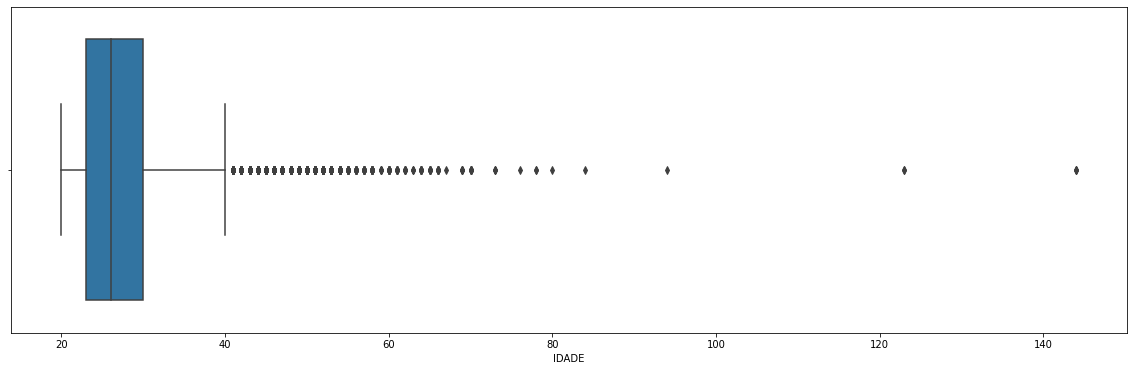

In [16]:
ax = sns.boxplot(x=dados['IDADE'])
ax.figure.set_size_inches(20, 6)

É altamente improvável pessoas com idade superior a 120 anos.

In [18]:
dados[dados['IDADE'] > 120]

,IDADE,RENDIMENTO_ANUAL,SITUACAO_PROPRIEDADE,ANOS_TRABALHADOS,MOTIVO_EMPRESTIMO,PONTUACAO,VALOR_EMPRESTIMO,JUROS,POSSIB_INADIMPLENCIA,EMPRESTIMO_PERC_RENDA_ANUAL,INADIMPLENTE,ANOS_PRIMEIRO_CREDITO
12360,144.0,6000000.0,Hipotecada,12.0,Pessoal,C,5000.0,12.73,0.0,0.00,0.0,25
18648,123.0,80004.0,Alugada,2.0,Educativo,B,20400.0,10.25,0.0,0.25,0.0,3
19597,144.0,200000.0,Hipotecada,4.0,Educativo,B,6000.0,11.86,0.0,0.03,0.0,2
23469,123.0,78000.0,Alugada,7.0,Empreendimento,B,20000.0,NaN,0.0,0.26,0.0,4
32584,144.0,250000.0,Alugada,4.0,Empreendimento,C,4800.0,13.57,0.0,0.02,0.0,3


Essas 5 linhas representam apenas uma fração muito diminuta do dataset (menos de 0,1%).

Elas serão removidas.

In [23]:
dados = dados.drop(dados[dados['IDADE'] > 120].index)

## Notebook WIP...